# Problem Set #2 - Part 1

MACS 30000, Dr. Evans

Haihao Guo

### Exercise 2.1

In [2]:
g = lambda x: 0.1 * x ** 4 - 1.5 * x ** 3 + 0.53 * x ** 2 + 1
g(1)
def integral_(g, a, b, N, method):
    
    outcome = 0
    
    def x_m(i):
        return a + (2 * i + 1) * (b - a) / (2 * N)
    
    def x_t(i):
        return a + i * (b - a) / N

    def x_s(i):
        return a + i * (b - a) / (2 * N)
    
    if method == 'midpoint':
        outcome += ((b - a) / N) * sum([g(x_m(i)) for i in range(N - 1)])
    elif method == 'trapezoid':
        outcome += ((b - a) / (2 * N)) * (g(a) + 2 * sum([g(x_t(i + 1)) for i in range(N - 2)]) + g(b))
    elif method == 'Simpsons':
        outcome += ((b - a) / (6 * N)) * (g(a) + 4 * sum([g(x_s(i)) for i in range(1, 2 * N) if i%2 != 0])\
                                          + 2 * sum([g(x_s(i)) for i in range(2, 2 * N - 1) if i%2 == 0]) + g(b))
    else:
        pass
        
    return outcome

t_ = 4373 + 1 / 3

m = integral_(g, -10, 10, 100000, 'midpoint')
t = integral_(g, -10, 10, 100000, 'trapezoid')
s = integral_(g, -10, 10, 100000, 'Simpsons')

print('The approximation using midpoint method is {} and the difference between this and the true value is {}'\
      . format(m, abs(m - t_)))
print('The approximation using trapezoid method is {} and the difference between this and the true value is {}'\
      . format(t, abs(t - t_)))
print('The approximation using Simpsons method is {} and the difference between this and the true value is {}'\
      . format(s, abs(s - t_)))

The approximation using midpoint method is 4373.422531176647 and the difference between this and the true value is 0.08919784331374103
The approximation using trapezoid method is 4373.422534494608 and the difference between this and the true value is 0.08920116127501387
The approximation using Simpsons method is 4373.333333333362 and the difference between this and the true value is 2.9103830456733704e-11


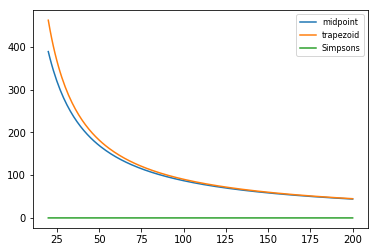

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Nvec = np.arange(20, 201, 1)
df = pd.DataFrame()
df['n'] = Nvec
df['error_midpoint'] = [abs(integral_(g, -10, 10, n, 'midpoint') - t_) for n in Nvec]
df['error_trapezoid'] = [abs(integral_(g, -10, 10, n, 'trapezoid') - t_) for n in Nvec]
df['error_Simpsons'] = [abs(integral_(g, -10, 10, n, 'Simpsons') - t_) for n in Nvec]

plt.plot(df['n'], df['error_midpoint'], label='midpoint')
plt.plot(df['n'], df['error_trapezoid'], label='trapezoid')
plt.plot(df['n'], df['error_Simpsons'], label='Simpsons')
plt.legend(loc = 'upper right',prop = {'size': 8})

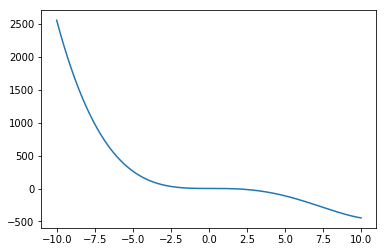

In [48]:
x_ = np.linspace(-10, 10, 1000)
plt.plot(x_, g(x_))
plt.show()

As this graph of g(x) shows, g(x) changed rapidly on [-10, -5]. This could be the source of the difference. In the graph comparing different integral approximation methods, we could find that Simpsons method behaves much better than the other 2. That is because compared to the midpoint and trapezoid method, Simpsons method used the second derivative and therefore could get a closer approximation.

### Exercise 2.2

In [19]:
import numpy as np
import scipy as sp
from scipy.stats import norm
import pandas as pd

def newton_norm(mu, sigma, N, k):
    z = np.linspace(mu - k * sigma, mu + k * sigma, N)
    w = np.zeros(N)
    
    w[0] = sp.stats.norm.cdf((z[0] + z[1])/2, loc=mu, scale=sigma)
    
    f = lambda x: sp.stats.norm.pdf(x, loc=mu, scale=sigma)
    for i in range(1, N - 1):
        z_min = (z[i - 1] + z[i]) / 2
        z_max = (z[i + 1] + z[i]) / 2
        w[i] = sp.integrate.quad(f, z_min, z_max)[0]
        
    w[N - 1] = 1 - sp.stats.norm.cdf((z[N - 2] + z[N - 1]) / 2, loc=mu, scale=sigma)
    
    return z, w

#N=11
z, w = newton_norm(5, 1.5, 11, 3)
df = pd.DataFrame()
df['nodes'] = z
df['weights'] = w
df.index += 1
df

,nodes,weights
1,0.5,0.003467
2,1.4,0.014397
3,2.3,0.048943
4,3.2,0.117253
5,4.1,0.198028
6,5.0,0.235823
7,5.9,0.198028
8,6.8,0.117253
9,7.7,0.048943
10,8.6,0.014397


### Exercise 2.3

In [20]:
def newton_lognorm(mu, sigma, N, k):
    z = np.linspace(mu - k * sigma, mu + k * sigma, N)
    w = np.zeros(N)
    a = np.e ** z
    
    w[0] = sp.stats.norm.cdf((z[0] + z[1])/2, loc=mu, scale=sigma)
    
    f = lambda x: sp.stats.norm.pdf(x, loc=mu, scale=sigma)
    for i in range(1, N - 1):
        z_min = (z[i - 1] + z[i]) / 2
        z_max = (z[i + 1] + z[i]) / 2
        w[i] = sp.integrate.quad(f, z_min, z_max)[0]
        
    w[N - 1] = 1 - sp.stats.norm.cdf((z[N - 2] + z[N - 1]) / 2, loc=mu, scale=sigma)
    
    return a, w

#N=11
a, w = newton_lognorm(5, 1.5, 11, 3)
df = pd.DataFrame()
df['nodes'] = a
df['weights'] = w
df.index += 1
df

,nodes,weights
1,1.648721,0.003467
2,4.055200,0.014397
3,9.974182,0.048943
4,24.532530,0.117253
5,60.340288,0.198028
6,148.413159,0.235823
7,365.037468,0.198028
8,897.847292,0.117253
9,2208.347992,0.048943
10,5431.659591,0.014397


### Exercise 2.4

In [21]:
a, w = newton_lognorm(10.5, 0.8, 11, 3)
approximation = sum(np.multiply(a, w))
expected = np.e ** (10.5 + 0.5 * (0.8 ** 2))


d = abs(approximation - expected)
print("My approximation is: {}, the expected value is {}, the difference is {}".format(approximation, expected, d))

My approximation is: 50352.456192765865, the expected value is 50011.08700852173, the difference is 341.36918424413307


### Exercise 3.1

In [22]:
import scipy as sp

N = 3
a = -10
b = 10


def h(x):
    return [((b ** (i + 1) - a ** (i + 1)) / (i + 1) - \
             sum(x[:N][k] * (x[N:][k] ** i) for k in range(N))) for i in range (2 * N)]

def gauss_quad(f, N=3, a=-10, b=10):
    w_init = [1 / N for i in range(N)]
    x_init = [a + i * (b - a) / (N - 1) for i in range(N)] 
    wx_init = w_init + x_init
    
    wn = [k for k in sp.optimize.root(h, wx_init)['x']] 
    w = wn[:N]
    n = wn[N:]
    return sum([(w[i] * f(n[i])) for i in range(N)])

g = lambda x: 0.1 * x ** 4 - 1.5 * x ** 3 + 0.53 * x ** 2 + 1
gauss = gauss_quad(g, N=3, a=-10, b=10)
t_ = 4373 + 1 / 3
m = integral_(g, -10, 10, 3, 'midpoint')
t = integral_(g, -10, 10, 3, 'trapezoid')
s = integral_(g, -10, 10, 3, 'Simpsons')

print('The approximation using gauss method is {} and the difference between this and the true value is {}'\
      . format(gauss, abs(t_ - gauss)))
print('The approximation using midpoint method is {} and the difference between this and the gauss value is {}'\
      . format(m, abs(m - gauss)))
print('The approximation using trapezoid method is {} and the difference between this and the gauss value is {}'\
      . format(t, abs(t - gauss)))
print('The approximation using Simpsons method is {} and the difference between this and the gauss value is {}'\
      . format(s, abs(s - gauss)))

The approximation using gauss method is 4373.333333174393 and the difference between this and the true value is 1.5893965610302985e-07
The approximation using midpoint method is 4450.205761316871 and the difference between this and the gauss value is 76.87242814247747
The approximation using trapezoid method is 7525.267489711934 and the difference between this and the gauss value is 3151.9341565375407
The approximation using Simpsons method is 4406.255144032921 and the difference between this and the gauss value is 32.92181085852735


### Exercise 3.2

In [36]:
import scipy
scipy_appro = scipy.integrate.quad(g, -10, 10)
print('The approximation using Gaussian quadrature command method is {} and the difference between this and the true value is {}'\
      . format(scipy_appro[0], abs(scipy_appro[0] - t_)))

The approximation using Gaussian quadrature command method is 4373.333333333334 and the difference between this and the true value is 9.094947017729282e-13


### Exercise 4.1

In [39]:
import scipy.stats as sts

np.random.seed(seed=25)

def g_(x, y):
    g = 0
    if x ** 2 + y ** 2 <= 1:
        g += 1
    else:
        pass    
    return g


def MC_appro(g, domain, N):   
    x_draws = sts.uniform.rvs(loc=domain[0], scale=domain[1] - domain[0], size=N)
    y_draws = sts.uniform.rvs(loc=domain[2], scale=domain[3] - domain[2], size=N)
    approx_int = (4 / N) * sum([g(x_draws[i], y_draws[i]) for i in range(N)])
    return approx_int

approx_int = 0
N = 1
while round(approx_int, 4) != 3.1415:
    N += 1
    approx_int = MC_appro(g_, [-1, 1, -1, 1], N)

print('The smallest number of random draws is {}'.format(N))

The smallest number of random draws is 615


### Exercise 4.2

In [37]:
import numpy as np

def isPrime(n):
    '''
    --------------------------------------------------------------------
    This function returns a boolean indicating whether an integer n is a
    prime number
    --------------------------------------------------------------------
    INPUTS:
    n = scalar, any scalar value

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    i = integer in [2, sqrt(n)]

    FILES CREATED BY THIS FUNCTION: None

    RETURN: boolean
    --------------------------------------------------------------------
    '''
    for i in range(2, int(np.sqrt(n) + 1)):
        if n % i == 0:
            return False

    return True

In [38]:
def primes_ascend(N, min_val=2):
    '''
    --------------------------------------------------------------------
    This function generates an ordered sequence of N consecutive prime
    numbers, the smallest of which is greater than or equal to 1 using
    the Sieve of Eratosthenes algorithm.
    (https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)
    --------------------------------------------------------------------
    INPUTS:
    N       = integer, number of elements in sequence of consecutive
              prime numbers
    min_val = scalar >= 2, the smallest prime number in the consecutive
              sequence must be greater-than-or-equal-to this value

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        isPrime()

    OBJECTS CREATED WITHIN FUNCTION:
    primes_vec     = (N,) vector, consecutive prime numbers greater than
                     min_val
    MinIsEven      = boolean, =True if min_val is even, =False otherwise
    MinIsGrtrThn2  = boolean, =True if min_val is
                     greater-than-or-equal-to 2, =False otherwise
    curr_prime_ind = integer >= 0, running count of prime numbers found

    FILES CREATED BY THIS FUNCTION: None

    RETURN: primes_vec
    --------------------------------------------------------------------
    '''
    primes_vec = np.zeros(N, dtype=int)
    MinIsEven = 1 - min_val % 2
    MinIsGrtrThn2 = min_val > 2
    curr_prime_ind = 0
    if not MinIsGrtrThn2:
        i = 2
        curr_prime_ind += 1
        primes_vec[0] = i
    i = min(3, min_val + (MinIsEven * 1))
    while curr_prime_ind < N:
        if isPrime(i):
            curr_prime_ind += 1
            primes_vec[curr_prime_ind - 1] = i
        i += 2

    return primes_vec

In [47]:
import numpy as np

def mach(x): 
        return x - x // 1
    
def s_generate(n, d, sequence): 
    p = primes_ascend(d)
    
    if sequence == 'weyl':
        return [mach(n * np.sqrt(p[i])) for i in range(d)]
    elif sequence == 'haber':
        return [mach(n * (n + 1) * 0.5 * np.sqrt(p[i])) for i in range(d)]
    elif sequence == 'niederreiter':
        return [mach(n * (2 ** (i / (n + 1)))) for i in range(1, d + 1)]
    elif sequence == 'baker':
        return [mach(n * (np.e ** ([1 / (i + 1) for i in range(d)][i]))) for i in range(d)]
    
print(s_generate(1073, 2, 'weyl'))
print(s_generate(1073, 2, 'haber'))
print(s_generate(1073, 2, 'niederreiter'))
print(s_generate(1073, 2, 'baker'))

[0.45115242633119124, 0.49051652140519764]
[0.2688529398292303, 0.40737199457362294]
[0.6927253065300647, 0.38589783426255053]
[0.716401936555485, 0.07792346123756033]


### Exercise 4.3

In [41]:
import scipy.stats as sts

np.random.seed(seed=25)

def g_(x, y):
    g = 0
    if x ** 2 + y ** 2 <= 1:
        g += 1
    else:
        pass    
    return g


def MC_appro_quasi(g, domain, N, seq):   
    
    def quasi_draw(seq, domain):
        x1, x2 = domain[0], domain[1]
        y1, y2 = domain[2], domain[3]
        x_draw = [(x2 - x1) * s_generate(i, 2, seq)[0] + x1 for i in range(N)]
        y_draw = [(y2 - y1) * s_generate(i, 2, seq)[1] + y1 for i in range(N)] 
        return x_draw, y_draw
    
    x_draws, y_draws = quasi_draw(seq, domain)
    approx_int = (4 / N) * sum([g(x_draws[i], y_draws[i]) for i in range(N)])
    return approx_int

In [42]:
approx_int = 0
N = 1
while round(approx_int, 4) != 3.1415:
    N += 1
    approx_int = MC_appro_quasi(g_, [-1, 1, -1, 1], N, 'weyl')

print('The smallest number of weyl sequence draws is {}'.format(N))

The smallest number of weyl sequence draws is 1230


In [43]:
approx_int = 0
N = 1
while round(approx_int, 4) != 3.1415:
    N += 1
    approx_int = MC_appro_quasi(g_, [-1, 1, -1, 1], N, 'haber')

print('The smallest number of haber sequence draws is {}'.format(N))

The smallest number of haber sequence draws is 2064


In [44]:
approx_int = 0
N = 1
while round(approx_int, 4) != 3.1415:
    N += 1
    approx_int = MC_appro_quasi(g_, [-1, 1, -1, 1], N, 'niederreiter')
    if N > 3000:
        print('The smallest number of niederreiter sequence draws is bigger than 3000, which means niederreiter sequence may not converge.')
        break

if N <= 3000:
    print('The smallest number of niederreiter sequence draws is {}'.format(N))
else:
    pass

The smallest number of niederreiter sequence draws is bigger than 3000, which means niederreiter sequence may not converge.


In [45]:
approx_int = 0
N = 1
while round(approx_int, 4) != 3.1415:
    N += 1
    approx_int = MC_appro_quasi(g_, [-1, 1, -1, 1], N, 'baker')

print('The smallest number of baker sequence draws is {}'.format(N))

The smallest number of baker sequence draws is 205
